<a href="https://colab.research.google.com/github/mandarpanse/AI-Healthcare-MSAI/blob/main/AIHealthcare-HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Read the two CSV files into DataFrames
d1 = files.upload()
patient_df = pd.read_csv('PATIENTS.csv')

def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Step 1: Apply calculate_age function to create "age" column
patient_df["age"] = patient_df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

d2 = files.upload()
admission_df = pd.read_csv('ADMISSIONS.csv')

d3 = files.upload()
icd_procedured = pd.read_csv('PROCEDURES_ICD.csv')

d4 = files.upload()
icd_diagnoses = pd.read_csv('D_ICD_DIAGNOSES.csv')




Saving PATIENTS.csv to PATIENTS (6).csv


Saving ADMISSIONS.csv to ADMISSIONS (6).csv


Saving PROCEDURES_ICD.csv to PROCEDURES_ICD.csv


Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES.csv


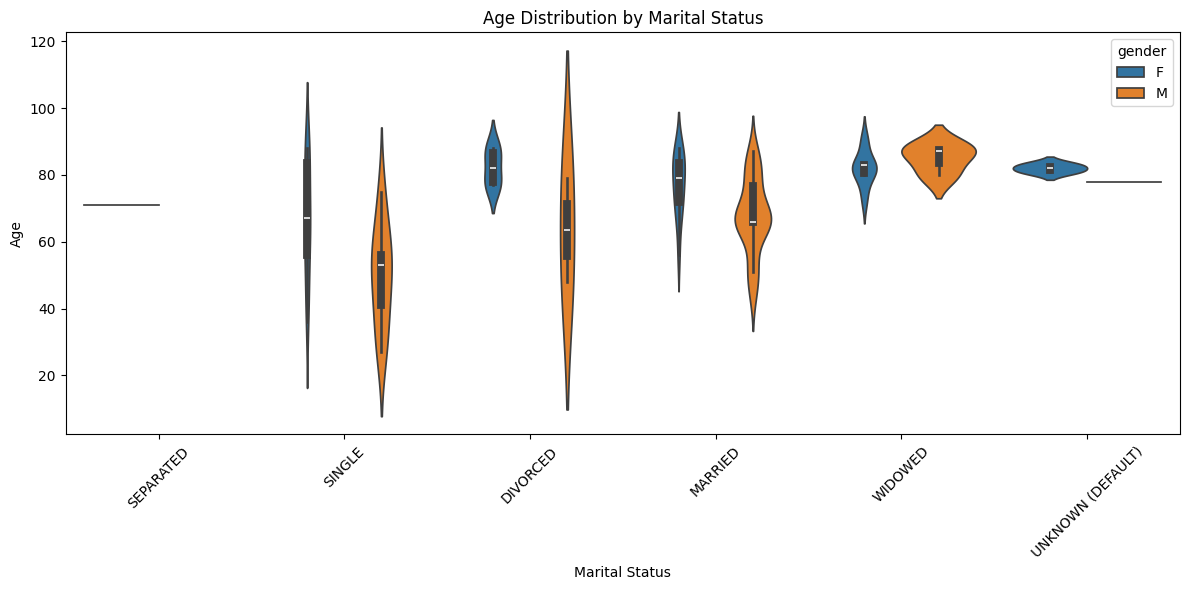

In [35]:


df = patient_df



# Step 2: Join the two DataFrames on the subject_id column
merged_df = pd.merge(df, admission_df, on='subject_id')
#print(merged_df['admission_type'].unique)


# Filter out rows with age greater than or equal to 120
filtered_df = merged_df[merged_df["age"] < 120]


# Step 3: Generate a violin plot based on age and religion
plt.figure(figsize=(12, 6))
sns.violinplot(x='marital_status', y='age', data=filtered_df, hue='gender')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()


<ipython-input-54-61b2c2518797>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=merged_df[merged_df['religion'] == 'BUDDHIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='BUDDHIST')
<ipython-input-54-61b2c2518797>:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=merged_df[merged_df['religion'] == 'CHRISTIAN SCIENTIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='CHRISTIAN SCIENTIST')
<ipython-input-54-61b2c2518797>:41: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


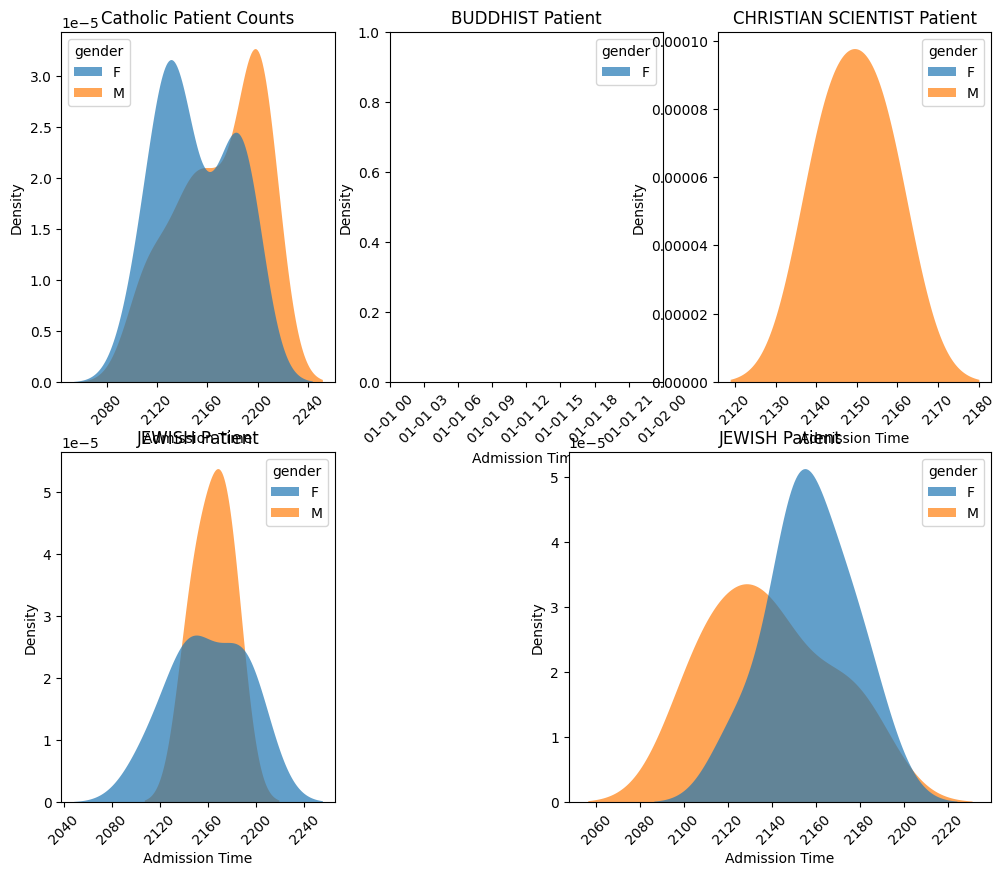

In [54]:
merged_df['admittime'] = pd.to_datetime(merged_df['admittime'])

# Create separate Ridge Plots for male and female patients
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.kdeplot(data=merged_df[merged_df['religion'] == 'CATHOLIC'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='catholic')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Catholic Patient Counts')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.kdeplot(data=merged_df[merged_df['religion'] == 'BUDDHIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='BUDDHIST')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('BUDDHIST Patient')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.kdeplot(data=merged_df[merged_df['religion'] == 'CHRISTIAN SCIENTIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='CHRISTIAN SCIENTIST')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('CHRISTIAN SCIENTIST Patient')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.kdeplot(data=merged_df[merged_df['religion'] == 'JEWISH'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='JEWISH')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('JEWISH Patient')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.kdeplot(data=merged_df[merged_df['religion'] == 'UNOBTAINABLE'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='UNOBTAINABLE')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('JEWISH Patient')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()



plt.show()
